<a href="https://colab.research.google.com/github/RMHuerta/predicciones-de-ventas-alimenticias/blob/main/prediciones_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/Codificación_de_Dojo/Semana02/sales_predictions_2023.csv'

df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿Cuántas filas y columnas?

In [ ]:
df.shape

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [ ]:
# Revisar Duplicados
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
# Contar los duplicados
df.duplicated().sum()

0

4) Identifiquen los valores faltantes.

In [ ]:
#Revisar si datos faltantes
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

* 1463 datos faltantes en columna 'Item_Weight' equivalente a 17.16% de datos faltates, se remplazan los nulos con promedio de peso de Tipo de Producto
* 2410 datos faltantes eb columna 'Outlet_Size' equivalente a 28.27% de datos faltantes, se reemplazan los nulos con "No registra" para los de 'Outlet_Identifier' = OUT010, OUT017, OUT045

In [ ]:
#reemplazar nulos con promedio peso por cada tipo de producto
df.groupby(['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [ ]:
#reemplazar nulos con "No registra" para los de 'Outlet_Identifier' = OUT010, OUT017, OUT045
df.groupby(['Outlet_Identifier'])['Outlet_Size'].count()

Outlet_Identifier
OUT010      0
OUT013    932
OUT017      0
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045      0
OUT046    930
OUT049    930
Name: Outlet_Size, dtype: int64

In [ ]:
#df.info()

In [ ]:
#df.describe()

6) Confirmen que no hay valores faltantes después de abordarlos.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent)

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Cambia Datos LF,low fat a Low Fat; reg a Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


  Tarea:
  
  Histograma para ver las distribuciones de diversas características en el conjunto de datos.

  Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

  Mapa de calor de la correlación entre las características.

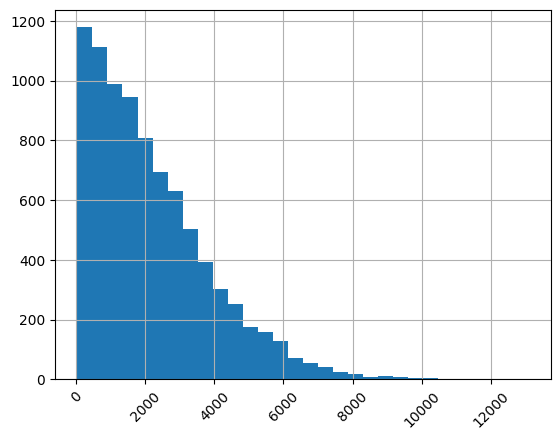

In [ ]:
#Histograma 'Outlet_Size'
df['Item_Outlet_Sales'].hist(bins = 30)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

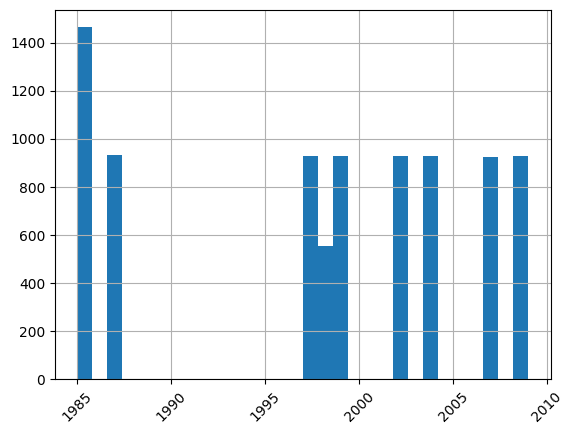

In [ ]:
#Histograma 'Outlet_Establishment_Year'
df['Outlet_Establishment_Year'].hist(bins = 30)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

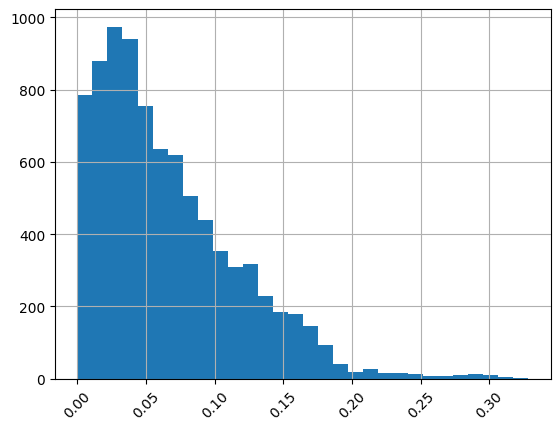

In [ ]:
#Histograma 'Item_Visibility'
df['Item_Visibility'].hist(bins = 30)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

<ipython-input-52-372d2f12c881>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

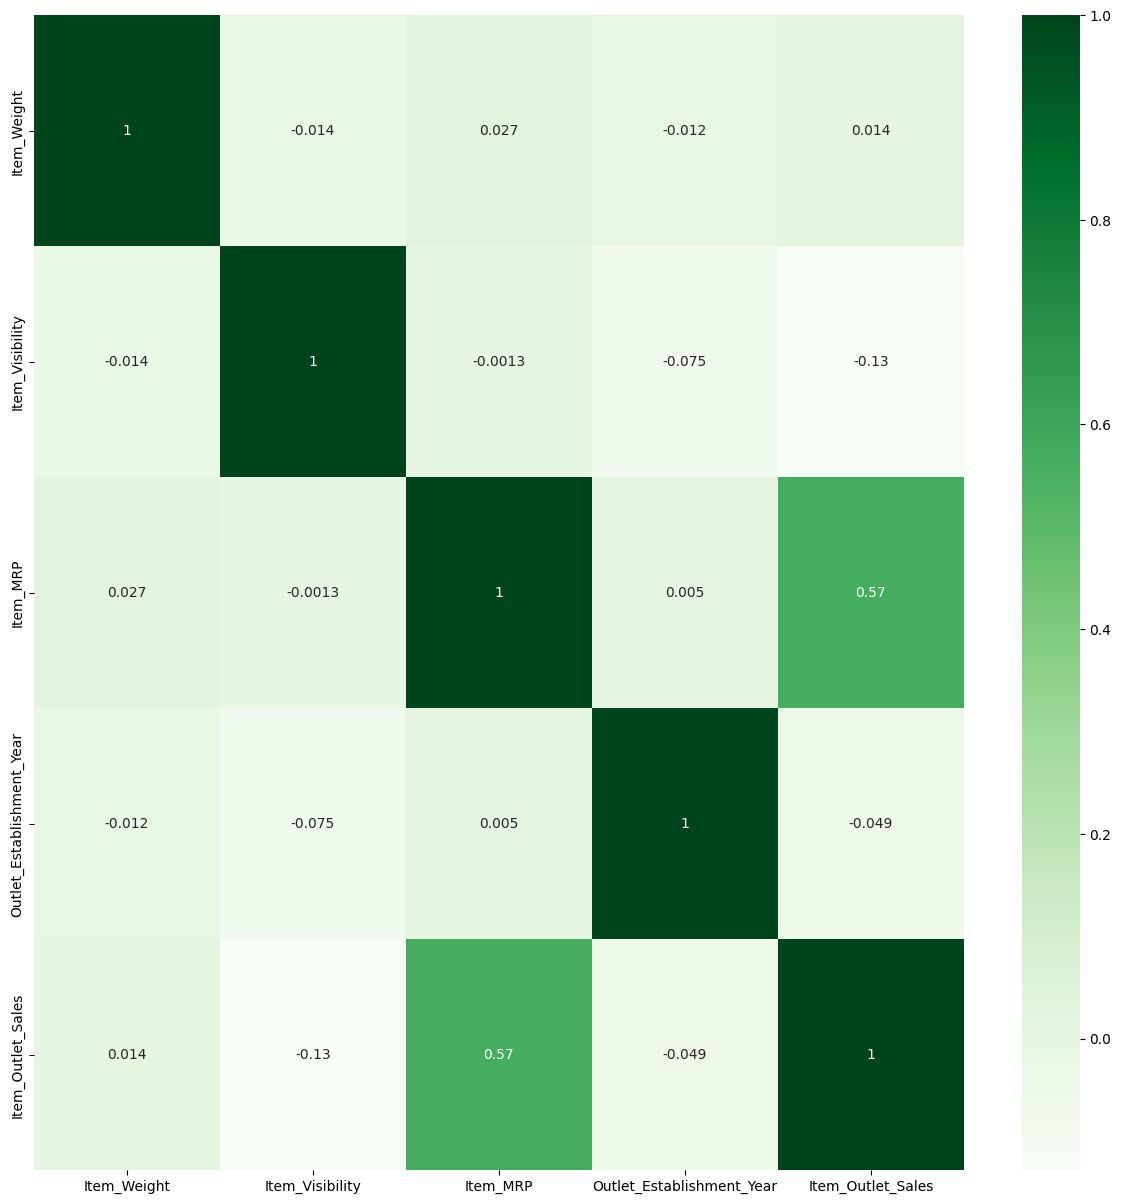

In [ ]:
#Mapa de calor

corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap = 'Greens', annot = True)